In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('turk_results.csv')
df.columns
df = df[['Answer.Gender','Answer.age', 'Answer.reasons', 'Answer.timesSeenDr','Answer.yourGender']]
df = df[df['Answer.timesSeenDr'] != '0' ]
print('Mean age = ', df['Answer.age'].mean(), 'Std = ', df['Answer.age'].std(),\
      ' Male = ', df[df['Answer.yourGender']=='Male'].shape[0], 'Female = ',df[df['Answer.yourGender']=='Female'].shape[0])

Mean age =  36.45794392523364 Std =  11.367182467177562  Male =  60 Female =  47


<h2>Compare population proportions example 15.3</h2>

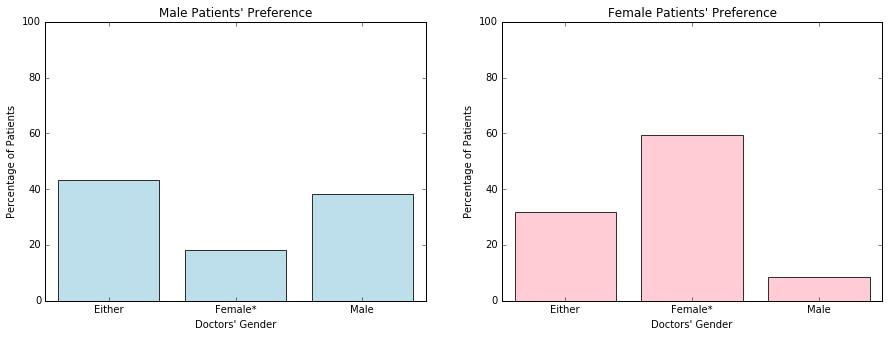

In [125]:
gender = ['Either','Female','Male']
df_counts = df.groupby(['Answer.yourGender','Answer.Gender']).nunique()['Answer.reasons']
sig = ['','*']

p1 = [n/sum(df_counts.tolist()[3:]) for n in df_counts.tolist()[3:]]
p2 = [n/sum(df_counts.tolist()[0:3]) for n in df_counts.tolist()[0:3]]
n1 = df[df['Answer.yourGender']=='Male'].shape[0]
n2 = df[df['Answer.yourGender']=='Female'].shape[0]
p0 = [(i*n1+j*n2)/(n1+n2) for (i,j) in zip(p1,p2)]
c = (1/n1)+(1/n2)
z_obs = [(i-j)/np.sqrt(k*(1-k)*c) for (i,j,k) in zip(p1,p2,p0)]
a_obs = scipy.stats.norm(0, 1).cdf(z_obs)
a_ = [1 if (i< 0.05) else 0 for i in a_obs ]
a_

y_pos = np.arange(3)
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.title('Male Patients\' Preference')
plt.bar(y_pos,[n/sum(df_counts.tolist()[3:])*100 for n in df_counts.tolist()[3:]],align='center', alpha=0.8,color = 'lightblue')
plt.xticks(y_pos, [i if (j==0) else i+'*' for (i,j) in zip(gender,a_)])
plt.xlabel('Doctors\' Gender')
plt.ylabel('Percentage of Patients')
plt.ylim(0,100)

plt.subplot(1,2,2)
plt.title('Female Patients\' Preference')
plt.bar(y_pos,[n/sum(df_counts.tolist()[0:3])*100 for n in df_counts.tolist()[0:3]],align='center', alpha=0.8,color = 'pink')
plt.xticks(y_pos, [i if (j==0) else i+'*' for (i,j) in zip(gender,a_)])
plt.ylabel('Percentage of Patients')
plt.xlabel('Doctors\' Gender')
plt.ylim(0,100)

plt.show()